<a href="https://colab.research.google.com/github/NewTech-bit/DLB/blob/main/DLB_FinalDataChallenge_XL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is the final data challenge project for Deep Learning Datacamp at HSLU in September 2021. It's a group project conducted by Andreas Kläusli, Kevin Bollier, Ricky Roy Bruderer, and Xiying Liu.

## Import

In [1]:
import os
import os.path
import pathlib
import numpy as np
import pandas as pd
import cv2
import random

import PIL
import PIL.Image
import IPython.display as display

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [ ]:
# print(len([name for name in os.listdir('.') if os.path.isfile(name)]))

0


In [2]:
os.listdir()

['.config', 'sample_data']

## Load data

Data is uploaded by accessing files in Google Drive.

In [3]:
# mount google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_path = '/content/drive/MyDrive/DLB/training_data'
test_path = '/content/drive/MyDrive/DLB/validation_data'
train_dir = pathlib.Path(train_path)
test_dir = pathlib.Path(test_path)

In [ ]:
# builder = tfds.ImageFolder(test_path)
# print(builder.info)
# ds = builder.as_dataset(shuffle_files=True)
# # tfds.show_examples(ds, builder.info)
# tfds.show_examples(ds, ds_info)

In [5]:
train_image_count = len(list(train_dir.glob('*.jpg')))
test_image_count = len(list(test_dir.glob('*.jpg')))
print("Number of images in training dataset: ", train_image_count)
print("Number of images in testing dataset: ", test_image_count)

Number of images in training dataset:  0
Number of images in testing dataset:  0


In [6]:
cats_train = list(train_dir.glob('cat.*.jpg'))
dogs_train = list(train_dir.glob('dog.*.jpg'))
cats_test = list(test_dir.glob('cat.*.jpg'))
dogs_test = list(test_dir.glob('dog.*.jpg'))


cats_train_count = len(cats_train)
dogs_train_count = len(dogs_train)
cats_test_count = len(cats_test)
dogs_test_count = len(dogs_test)
print("Number of cat images in training: ", cats_train_count)
print("Number of dog images in training: ", dogs_train_count)
print('\n')
print("Number of cat images in testing: ", cats_test_count)
print("Number of dog images in testing: ", dogs_test_count)

Number of cat images in training:  0
Number of dog images in training:  0


Number of cat images in testing:  0
Number of dog images in testing:  0


In [ ]:
# # define a function to count images
# def count_image(file_dir, image_class):
#   image_count = len(list(file_dir.glob('*.jpg')))
#   image_class_count = len(list(file_dir.glob('image_class.*.jpg')))
#   return image_count, image_class_count

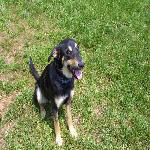

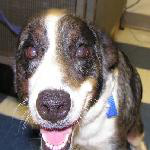

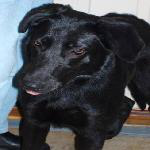

In [ ]:
for image_path in list(train_dir.glob('*.jpg'))[:3]:
  display.display(PIL.Image.open(str(image_path)))

## Load data

Using `tf.data.Dataset`

Define some parameters for the loader:

In [7]:
batch_size = 17
img_height = 200
img_width = 200

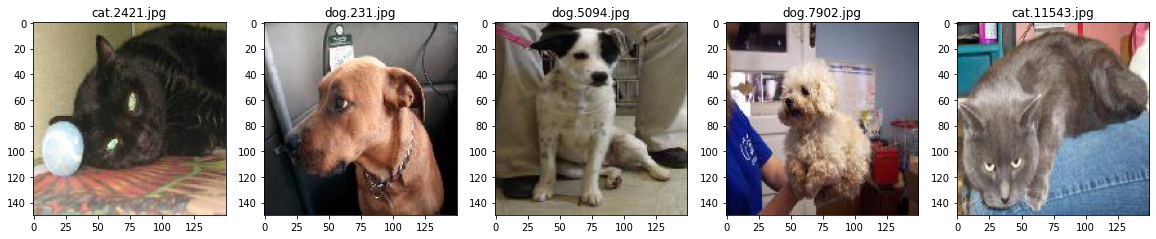

In [ ]:
# show random five images from training dataset
plt.figure(figsize=(20,20))

for i in range(5):
  file = random.choice(os.listdir(train_path))
  image_path = os.path.join(train_path, file)
  img = mpimg.imread(image_path)
  ax = plt.subplot(1, 5, i+1)
  ax.title.set_text(file)
  plt.imshow(img)

In [ ]:
os.listdir(test_path)[3] # check naming convention of images

'dog.4713.jpg'

In [8]:
# setting parameters for loading the dataset
IMG_WIDTH = 128
IMG_HEIGHT = 128
# train_path = '/content/drive/MyDrive/DLB/training_data'
# test_path = '/content/drive/MyDrive/DLB/validation_data'

In [ ]:
# creating the image data and the lables

def create_dataset(img_folder):
  img_data_array=[]
  class_name=[]

  for file in os.listdir(img_folder):
    image_path = os.path.join(img_folder, file)
    cls_name = file[:3]
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_AREA)
    image = np.array(image)
    image = image.astype('float32')
    image = image / 255.0
    img_data_array.append(image)
    class_name.append(cls_name)
  
  return img_data_array, class_name

In [ ]:
# create test dataset with (image, lable) pairs, takes ~6 mins
test_image, test_label = create_dataset(test_path)

In [ ]:
# create train dataset with (image, lable) pairs, takes ~17 mins
train_image, train_label = create_dataset(train_path)

In [ ]:
def class_encode(label):
  target_dict = {k:v for v, k in enumerate(np.unique(label))}
  target_value = [target_dict[label[i]] for i in range(len(label))]
  return target_value

In [ ]:
train_label = class_encode(train_label)
test_label = class_encode(test_label)

NameError: ignored

## Create deep learning models

In [ ]:
input_shape=(64,64,3)

In [ ]:
# # build a convolutional neural network withouth image argumentation
# def func_model():
#   input_layer = tf.keras.Input(shape=input_shape) # instantiate the input layer

#   x = Conv2D(16, (3,3), activation='relu')(input_layer) # stack layers using the functional API syntax
#   x = MaxPooling2D(2,2)
#   x = Conv2D(32, (3,3), activation='relu')(x)
#   x = MaxPooling2D(2,2)
#   x = Flatten()(x)
#   x = Dense(128, activation='relu')(x)

#   output_layer = Dense(1, activation='sigmoid')(x)

#   func_model = Model(inputs = input_layer, outputs=output_layer) # declare inputs and outputs

### 1. Baseline CNN model

In [ ]:
def model_conv():
  model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
                      MaxPooling2D(2,2),
                      Conv2D(64, (3,3), activation='relu'),
                      MaxPooling2D(2,2),
                      Flatten(),
                      Dense(128, activation='relu'),
                      Dense(1, activation='sigmoid')  
  ])

In [ ]:
model = func_model()
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

ValueError: ignored

In [ ]:
# flow images in batches of 20 using _datagen generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

image_size = (150, 150)
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=20,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size=image_size,
                                                   batch_size=20,
                                                   class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=171, # 2907 images = batch_size 17 * steps 171
    epochs = 15,
    validation_data= validation_generator,
    validation_steps=58,
    verbose=2
)

In [ ]:
# plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legen()

plt.show()

### CNN model with image augmentation

### Transfer learning

## Prediction